<a href="https://colab.research.google.com/github/nikibeep/ckt_qiskit/blob/main/ckt_q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


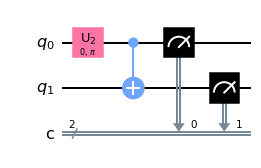

In [ ]:
!pip install qiskit
!pip install pylatexenc


from qiskit import QuantumCircuit, transpile
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with two qubits and two classical bits
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Apply a CNOT gate to the first and second qubits
qc.cx(0, 1)

# Measure the qubits and store the results in the classical bits
qc.measure([0, 1], [0, 1])

# Transpile the circuit for the qasm_simulator backend
qc = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=3)

# Draw the circuit diagram using the circuit_drawer function
circuit_drawer(qc, output='mpl')

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [ ]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [ ]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


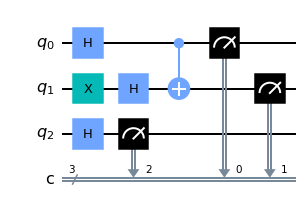

In [ ]:
# Matplotlib Drawing
circuit.draw(output='mpl')

In [ ]:
# Draw a new circuit with barriers and more registers

q_a = QuantumRegister(3, name='qa')
q_b = QuantumRegister(5, name='qb')
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)

circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

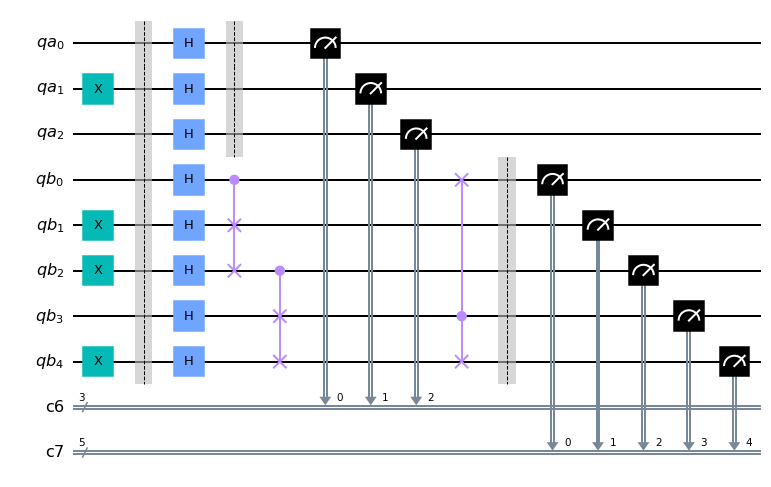

In [ ]:
# Draw the circuit
circuit.draw(output='mpl')

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from qiskit.visualization import plot_bloch_multivector

In [ ]:
# Define a quantum circuit with 2 qubits
circ = QuantumCircuit(2)

# Apply some gates to the qubits
circ.h(0)
circ.cx(0, 1)


In [ ]:
# Define a quantum circuit with 2 qubits
circ = QuantumCircuit(2)

# Apply some gates to the qubits
circ.h(0)
circ.cx(0, 1)


In [ ]:
def update(frame):
    # Clear the previous plot
    ax.clear()

    # Apply the gates to the circuit
    circ.rz(frame*np.pi/20, 0)
    circ.ry(frame*np.pi/20, 1)

    # Draw the circuit
    ax.set_title('Frame {}'.format(frame))
    statevector = execute(circ, backend=Aer.get_backend('statevector_simulator')).result().get_statevector()
    plot_bloch_multivector(statevector, ax=ax)




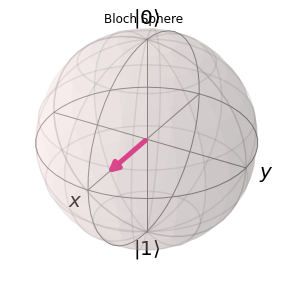

In [92]:
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt

# Create a quantum circuit
qc = QuantumCircuit(1)
qc.h(0)

# Get the statevector of the circuit
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
statevector = result.get_statevector(qc)

# Get the Bloch vector from the statevector
bloch_vector = [np.real(statevector[0]), np.imag(statevector[1]), np.imag(statevector[0]), np.real(statevector[1])]

# Create a new figure and axis
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Add the Bloch sphere plot to the axis
plot_bloch_vector(bloch_vector, ax=ax)

# Set the title of the axis
ax.set_title('Bloch Sphere')

# Show the plot
plt.show()




In [73]:
!pip uninstall qiskit
!pip install --upgrade qiskit

Found existing installation: qiskit 0.41.1
Uninstalling qiskit-0.41.1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/qiskit-0.41.1.dist-info/*
Proceed (Y/n)? Y
  Successfully uninstalled qiskit-0.41.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached qiskit-0.41.1-py3-none-any.whl


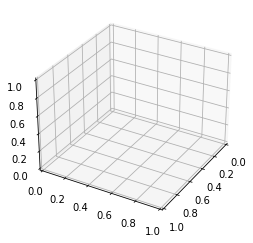

In [79]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Define the quantum circuit function
def quantum_circuit(frame):
    circ = QuantumCircuit(2)
    # Modify the circuit based on the current frame
    return circ

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(4, 4))

# Set the axis limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Define the update function for the animation
def update(frame):
    # Apply the quantum circuit to the initial state
    circ = quantum_circuit(frame)
    statevector = execute(circ, backend=Aer.get_backend('statevector_simulator')).result().get_statevector()
    
    # Create a new subplot for this frame's plot
    ax = plt.subplot(111, projection='3d')
    
    # Plot the Bloch sphere for the new statevector
    plot_bloch_multivector(statevector, title='Frame {}'.format(frame))
    
    # Set the view of the plot
    ax.view_init(azim=30, elev=30)
    
    # Return the new plot
    return ax



# Create the animation
ani = FuncAnimation(fig, update, frames=20, interval=500)

# Save the animation as a gif
ani.save('qubits.gif', writer='pillow', fps=2)


plt.show()


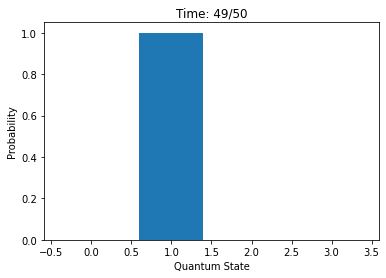

In [86]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the number of qubits and time steps
num_qubits = 2
num_steps = 50
times = np.linspace(0, 2*np.pi, num_steps)

# Define the initial state of the qubits
initial_state = [0, 1, 0, 0]  # |01>

# Define the function to create the initial quantum circuit
def initial_circuit(qc):
    qc.initialize(initial_state, range(num_qubits))
    return qc

# Define the function to apply the time evolution operator to the quantum circuit
def time_evolution(qc, time):
    qc.rzz(2*time, 0, 1)
    return qc

# Define the function to evolve the circuit
def evolve_circuit(time):
    qc = QuantumCircuit(num_qubits)
    qc = initial_circuit(qc)
    qc = time_evolution(qc, time)
    return qc

# Define the backend to use for the simulation
backend = Aer.get_backend('statevector_simulator')

# Define the function to generate the statevector of the circuit
def generate_statevector(time):
    qc = evolve_circuit(time)
    result = execute(qc, backend).result()
    statevector = result.get_statevector(qc)
    return statevector

# Define the function to update the animation
def update(frame):
    ax.clear()
    ax.set_title(f'Time: {frame}/{num_steps}')
    statevector = generate_statevector(times[frame])
    ax.bar(range(2**num_qubits), np.abs(statevector)**2)
    ax.set_xlabel('Quantum State')
    ax.set_ylabel('Probability')

# Set up the figure and axes for the animation
fig, ax = plt.subplots()
ax.set_ylim(0, 1)
ax.set_xlim(-1, 2**num_qubits)
ax.set_xticks(range(2**num_qubits))
ax.set_xticklabels([f'{i:b}'.zfill(num_qubits) for i in range(2**num_qubits)])
ax.set_xlabel('Quantum State')
ax.set_ylabel('Probability')

# Create the animation
ani = FuncAnimation(fig, update, frames=num_steps, repeat=False)

# Save the animation as a gif
ani.save('qubits.gif', writer='pillow', fps=2)

plt.show()




In [88]:
!git remote add origin https://github.com/nikibeep/ckt_qiskit.git

fatal: not a git repository (or any of the parent directories): .git
